## Intermediate Data Science

#### University of Redlands - DATA 201
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data201.joannabieri.com](https://joannabieri.com/data201_intermediate.html)

In [1]:
# Some basic package imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

### You Try - 3 Warm-Up Problems From Lecture

Run the data cell to see the data then answer the questions.

Each problem is separated by a line.

------------------------------------------------------

In [2]:
#DATA
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
example_series = pd.Series(sdata)
example_series

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

### You Try:

Using series methods and python code:

1. Get a list of the states that are the index.
2. Check if Idaho is in the index.
3. Get just the states with numbers less then 20,000.
4. Run the provided code and explain the results. Why do we end up with NaN and what does NaN mean?

In [5]:
# Your code here 
example_series = pd.Series(sdata)
example_series.index

Index(['Ohio', 'Texas', 'Oregon', 'Utah'], dtype='object')

In [7]:
# Your code here 2
'Idaho' in example_series.index

False

In [9]:
# Your code here 3
example_series[example_series>20000]

Ohio     35000
Texas    71000
dtype: int64

In [11]:
# Explain the results 4
states = ["California", "Ohio", "Oregon", "Texas"]
new_series = pd.Series(sdata, index=states)
new_series

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

Enter your words here: We end up with a NaN because in the original problem that this data came from, California is not an index or a series. NaN is used to represent that there is no number and is a place holder.

---------------------------------------

In [15]:
# DATA
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df = pd.DataFrame(data)
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


### You Try

1. How does the following command work?
2. See if you can add a column that check if the year is greater than 2001.

In [17]:
# How does this work 1
df['eastern'] = df['state'] == 'Ohio'
df

,state,year,pop,eastern
0,Ohio,2000,1.5,True
1,Ohio,2001,1.7,True
2,Ohio,2002,3.6,True
3,Nevada,2001,2.4,False
4,Nevada,2002,2.9,False
5,Nevada,2003,3.2,False


Enter your words here: This command is creating a fourth column named Eastern. What this column is doing is it is creating a boolean that checks if the state is equal to Ohio. If the column is equal to Ohio, then it responds True and if not then False.

------------------------------------------------

In [19]:
# DATA
df = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=["a", "c", "d"],
                     columns=["Ohio", "Texas", "California"])
df

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


### You Try
1. Get rows a and d for just Ohio and Texas.

In [21]:
# Your code here
df.loc[['a','d'],['Ohio','Texas']]

,Ohio,Texas
a,0,1
d,6,7


----------------------------------------

## Market Data from Lecture

In [23]:
# Lets read in some data and look at some statistics
price = pd.read_pickle("data/yahoo_price.pkl")
volume = pd.read_pickle("data/yahoo_volume.pkl")

In [25]:
returns = price.pct_change()
returns.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.013331,0.010035,0.006897


In [27]:
returns.describe()

,AAPL,GOOG,IBM,MSFT
count,1713.000000,1713.000000,1713.000000,1713.000000
mean,0.000972,0.000671,0.000236,0.000595
std,0.016641,0.015830,0.012102,0.014667
min,-0.123558,-0.083775,-0.082790,-0.113995
25%,-0.007516,-0.006904,-0.006049,-0.007376
50%,0.000886,0.000270,0.000234,0.000312
75%,0.010422,0.008462,0.006806,0.008162
max,0.088741,0.160524,0.056652,0.104522


In [29]:
returns['AAPL'].corr(returns['IBM'])

0.3868174361139099

In [31]:
returns.corr()

,AAPL,GOOG,IBM,MSFT
AAPL,1.000000,0.407919,0.386817,0.389695
GOOG,0.407919,1.000000,0.405099,0.465919
IBM,0.386817,0.405099,1.000000,0.499764
MSFT,0.389695,0.465919,0.499764,1.000000


In [33]:
returns.cov()

,AAPL,GOOG,IBM,MSFT
AAPL,0.000277,0.000107,0.000078,0.000095
GOOG,0.000107,0.000251,0.000078,0.000108
IBM,0.000078,0.000078,0.000146,0.000089
MSFT,0.000095,0.000108,0.000089,0.000215


--------------------------

## Pandas Analysis - Day2 HW

In [57]:
!conda install kagglehub

Error while loading conda entry point: conda-libmamba-solver (dlopen(/Users/sethchairez/anaconda3/lib/python3.12/site-packages/libmambapy/bindings.cpython-312-darwin.so, 0x0002): Library not loaded: @rpath/libarchive.19.dylib
  Referenced from: <DABAAA67-C742-3F02-A1E7-430216CA1374> /Users/sethchairez/anaconda3/lib/libmamba.2.0.0.dylib
  Reason: tried: '/Users/sethchairez/anaconda3/lib/libarchive.19.dylib' (no such file), '/Users/sethchairez/anaconda3/lib/python3.12/site-packages/libmambapy/../../../libarchive.19.dylib' (no such file), '/Users/sethchairez/anaconda3/lib/python3.12/site-packages/libmambapy/../../../libarchive.19.dylib' (no such file), '/Users/sethchairez/anaconda3/bin/../lib/libarchive.19.dylib' (no such file), '/Users/sethchairez/anaconda3/bin/../lib/libarchive.19.dylib' (no such file), '/usr/local/lib/libarchive.19.dylib' (no such file), '/usr/lib/libarchive.19.dylib' (no such file, not in dyld cache))
Retrieving notices: done

CondaValueError: You have chosen a non-de

In [35]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

/Users/sethchairez/anaconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



Path to dataset files: /Users/sethchairez/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1


In [37]:
# Copy the path to the data set
# For me this was:
file = '/Users/sethchairez/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1'
# Yours will be different!

df = pd. read_csv(file)
df

IsADirectoryError: [Errno 21] Is a directory: '/Users/sethchairez/.cache/kagglehub/datasets/yasserh/titanic-dataset/versions/1'

**Your goal is to do a quick analysis of the Titanic data! You can answer any questions that you find interesting but here are some things to start with:**

1. How many variables and observations? Which are Numerical/Categorical?
2. Do any of the columns have NaNs in them? What do NaNs mean?
3. How many passengers survived?
4. Is survival correlated with Fare?
5. How many passengers were alone vs. traveling with family?
6. Were people traveling alone more or less likely to survive?
7. Do the basic statistics change if you group by class?

and so on... see if you can come up with some questions of your own! Curiosity is a big part of data science!

How far can you get in just an hour or two?


---------------------------------

**Variable Notes**
- PassengerId:   Unique ID of the passenger
- Survived:   Survived (1) or died (0)
- Pclass:   Passenger’s class (1st, 2nd, or 3rd)
- Name:   Passenger’s name
- Sex:   Passenger’s sex
- Age:   Passenger’s age
- SibSp:   Number of siblings/spouses aboard the Titanic
- Parch:   Number of parents/children aboard the Titanic
- Ticket:   Ticket number
- Fare:   Fare paid for ticket
- Cabin:   Cabin number
- Embarked:   Where the passenger got on the ship (C — Cherbourg, S — Southampton, Q = Queenstown)

------------------------------------

Your final notebook should:

- [ ] Be a completely new notebook with just the Titanic stuff in it: HW2-Titanic.ipynb
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

## 1.  How many variables and observations? Which are Numerical/Categorical?


In [49]:
file = 'Titanic-Dataset.csv'
df = pd.read_csv(file)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [100]:
df.shape

(891, 12)

In this sample data, There are 892 observations and 12 variables

In [51]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In this sample data there are, integers, strings,and floats. 7 of the variables are numerical data(either integer or float) and the other 5 are strings. 

## 2. Do any of the columns have NaNs in them? What do NaNs mean?


In [57]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The NaN's in the data frame appear mostly in age and in the cabin columns. This could mean that the NaN's for the age are either babies that were newborns or people they were not able to collect an age from. In the Cabin, this means that they were too many individuals in the cabin and they could not count the number of them. 

## 3. How many passengers survived?

In [154]:
df['Did not Die'] = df['Survived'] == 1  
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Did not Die
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,True


In [156]:
df['Did not Die'].sum()

342

## 4. Is survival correlated with Fare?


In [158]:
df['Survived'].corr(df['Fare'])

0.2573065223849625

In this sample data, I was able to conclude that People that paid higher fares were a little more likely to survive then the people that did not. 

## 5. How many passengers were alone vs. traveling with family?

In [65]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [67]:
variable_zero = df['SibSp'] == 0
variable_zero.sum()

608

In [164]:
# The 608 means that there were 608 passengers that decided to travel alone. 

In [69]:
variable_one = df['SibSp'] == 1
variable_one.sum()

209

In [74]:
variable_two = df['SibSp'] == 2
variable_two.sum()

28

In [77]:
variable_three = df['SibSp'] == 3
variable_three.sum()

16

In [80]:
variable_four = df['SibSp'] == 5
variable_four.sum()

5

In [83]:
variable_five = df['SibSp'] == 8 
variable_five.sum()

7

I can conclude from looking at the results of this data, there were 608 passengers that were alone versus a combined number of 265 that traveled with someone 

## 6. Were people traveling alone more or less likely to survive?

In [101]:
variable_zero.corr(df['Survived'])

-0.11586749862222318

In [104]:
variable_one.corr(df['Survived'])

0.17307592927371857

In [107]:
variable_two.corr(df['Survived'])

0.029796395739663604

In [110]:
variable_three.corr(df['Survived'])

-0.037214751836087946

In [113]:
variable_four.corr(df['Survived'])

-0.05929185283871779

In [117]:
variable_five.corr(df['Survived'])

-0.07023438247444529

## 7.  Do the basic statistics change if you group by class


In [137]:
df.groupby('Pclass')

In [133]:
df.groupby('Pclass').describe()

PassengerId                                                             \
             count        mean         std   min     25%    50%    75%    max   
Pclass                                                                          
1            216.0  461.597222  246.737616   2.0  270.75  472.0  670.5  890.0   
2            184.0  445.956522  250.852161  10.0  234.50  435.5  668.0  887.0   
3            491.0  439.154786  264.441453   1.0  200.00  432.0  666.5  891.0   

       Survived            ... Parch        Fare                             \
          count      mean  ...   75%  max  count       mean        std  min   
Pclass                     ...                                                
1         216.0  0.629630  ...   0.0  4.0  216.0  84.154687  78.380373  0.0   
2         184.0  0.472826  ...   1.0  3.0  184.0  20.662183  13.417399  0.0   
3         491.0  0.242363  ...   0.0  6.0  491.0  13.675550  11.778142  0.0   

                                           
             25%      50%   75%       max  
Pclass                                     
1       30.92395  60.2875  93.5  512.3292  
2       13.00000  14.2500  26.0   73.5000  
3        7.75000   8.0500  15.5   69.5500  

[3 rows x 48 columns]

I am a little cofused as to what the question is asking however I believe yes. Yes, the overall statistics do change when grouped by class. When the data set was comapred overall the average for just class was close to .38. After looking at class 1,2,3 we can see that class 1's mean was 461, class 2's was 445 and 3's was 439. Their minimum and maximum are different as well. 

## Additional questions

In [141]:
#Is there a correlation between and fare
df['Pclass'].corr(df['Fare'])

-0.5494996199439074

According to the data, there is no correlation between the fare and the passengers class. This is interesting because in order to sit in a higher class, it means that people generally have more money. 

In [179]:
#Were women more likely to survive then men

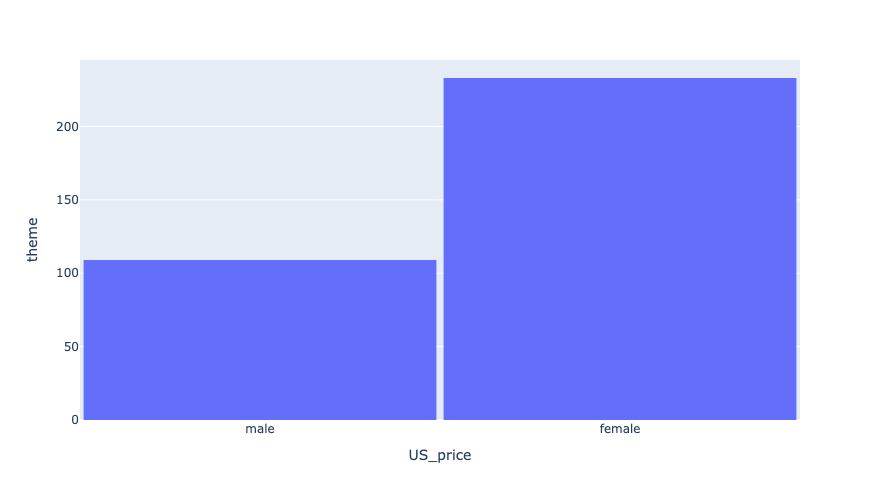

In [209]:
fig = px.histogram(df,
                 x='Sex',
                 y= 'Survived',
                 nbins=18,
                  )

fig.update_layout(bargap=0.02,
                  yaxis_title="theme",
                  xaxis_title="US_price",
                  autosize=False,
                  width=800,
                  height=500)

fig.show()

This bar graph clearly shows us that women survived more than men after the titanic sank.